In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Metrics
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("C:/Users/johnr/OneDrive/Documents/Cardekho Prediction/cardekho_data.csv")

In [3]:
numerical_columns = data.select_dtypes(include = ['number']).columns
categorical_columns = data.select_dtypes(exclude = ['number']).columns

In [4]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#Change year to DateTime
import datetime
current_year = datetime.date.today().year
data['Vehicle_age'] = current_year - data['Year']
data.drop('Year', axis = 1, inplace = True)

In [7]:
numerical_columns = data.select_dtypes(include = ['number']).columns
categorical_columns = data.select_dtypes(exclude = ['number']).columns

In [8]:
#Encoding Categorical Variables
data = pd.get_dummies(data = data, columns = ['Fuel_Type','Seller_Type','Transmission'])

In [9]:
#Check Null Values
data.isnull().sum()

Car_Name                  0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Vehicle_age               0
Fuel_Type_CNG             0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Dealer        0
Seller_Type_Individual    0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

In [10]:
#Checking Duplicates
data.duplicated().sum()

2

In [11]:
data.drop_duplicates(inplace = True)

<AxesSubplot:>

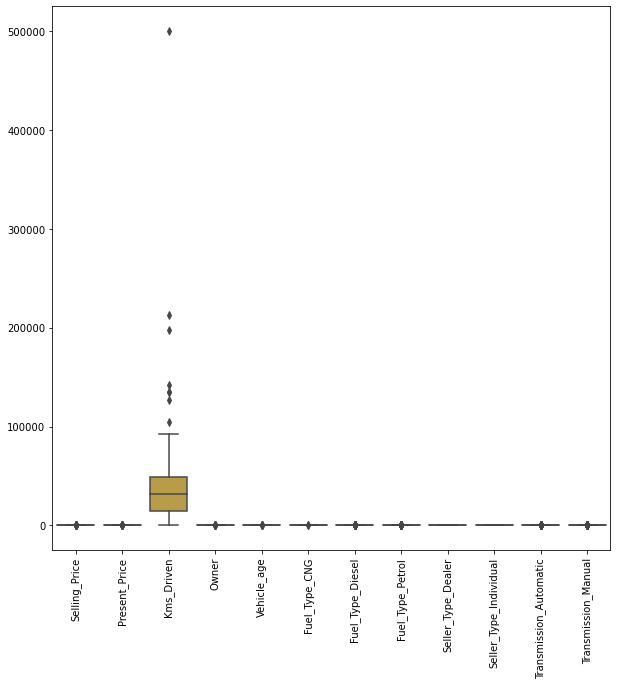

In [12]:
#Outlier Detection 
plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)
sns.boxplot(data = data)

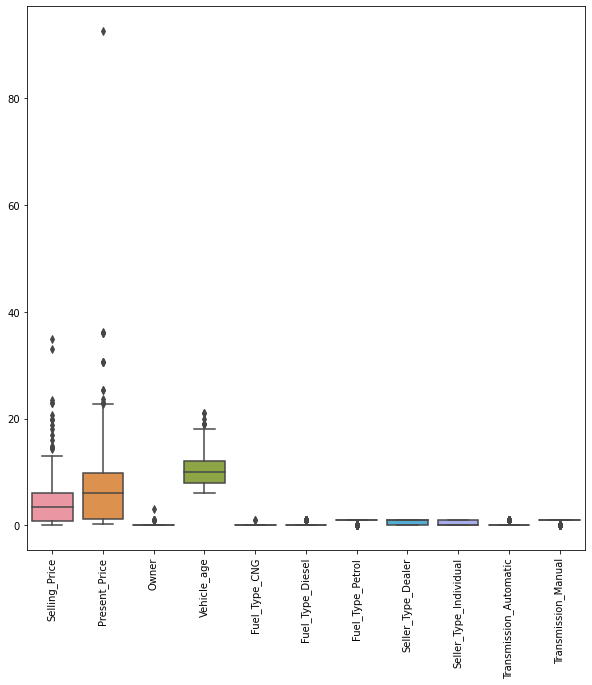

In [13]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.boxplot(data = data.copy().drop('Kms_Driven', axis = 1))
plt.show()

In [14]:
#Outlier Removal Function
def outlier_removal(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1 
    
    upper_limit = Q3+(1.5*iqr)
    lower_limit = Q1-(1.5*iqr)
    
    data[col] = data[col].apply(lambda x:upper_limit if x > upper_limit else x)
    data[col] = data[col].apply(lambda x:lower_limit if x < lower_limit else x)

In [15]:
outlier_removal(col = 'Selling_Price')
outlier_removal(col = 'Kms_Driven')
outlier_removal(col = 'Present_Price')

In [16]:
data.shape

(299, 13)

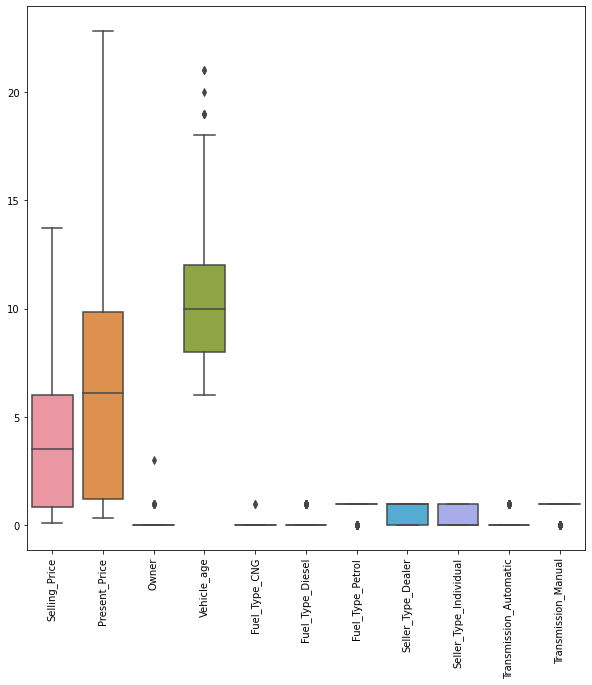

In [17]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 90)
sns.boxplot(data = data.copy().drop('Kms_Driven', axis = 1))
plt.show()

<AxesSubplot:>

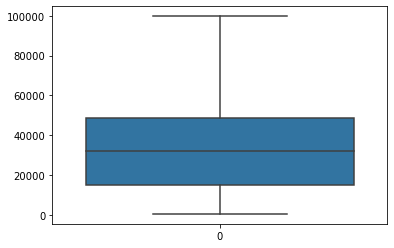

In [18]:
sns.boxplot(data = data['Kms_Driven'])

In [19]:
#Final Data Check
data.head(10)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,3.35,5.59,27000.0,0,10,0,0,1,1,0,0,1
1,sx4,4.75,9.54,43000.0,0,11,0,1,0,1,0,0,1
2,ciaz,7.25,9.85,6900.0,0,7,0,0,1,1,0,0,1
3,wagon r,2.85,4.15,5200.0,0,13,0,0,1,1,0,0,1
4,swift,4.60,6.87,42450.0,0,10,0,1,0,1,0,0,1
5,vitara brezza,9.25,9.83,2071.0,0,6,0,1,0,1,0,0,1
6,ciaz,6.75,8.12,18796.0,0,9,0,0,1,1,0,0,1
7,s cross,6.50,8.61,33429.0,0,9,0,1,0,1,0,0,1
8,ciaz,8.75,8.89,20273.0,0,8,0,1,0,1,0,0,1
9,ciaz,7.45,8.92,42367.0,0,9,0,1,0,1,0,0,1


In [20]:
#Removing Unnecessary Columns
data = data.drop('Car_Name', axis = 1)

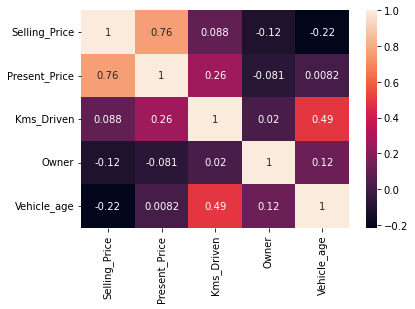

In [21]:
#Correlation
correlation = data[numerical_columns].corr(method = 'kendall')
sns.heatmap(correlation, annot = True)
plt.show()

# Data preparation before Predictions

# Scaling the data 

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ScaledData = pd.DataFrame(ss.fit_transform(data),columns = ss.feature_names_in_)

## Train Test Split

In [23]:
X = ScaledData.copy().drop('Selling_Price', axis = 1)
Y = ScaledData['Selling_Price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)

# Modelling The Data

### Decision Tree Regressor

In [25]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
decision_tree_preds = pd.DataFrame(decision_tree.predict(X_test))

In [26]:
mean_absolute_error(decision_tree_preds,y_test)

0.29215515487796956

### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
random_forest_preds = random_forest.predict(X_test)

In [28]:
mean_absolute_error(random_forest_preds, y_test)

0.23468159577679973

In [29]:
prediction_data = pd.DataFrame({'Real_Values':y_test, 'Predicted_Values':random_forest_preds})